In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.dates as dates

## check for dataset

In [2]:
path_data_istabul = 'data/Istanbul Weather Data.csv'

df = pd.read_csv(path_data_istabul)
print(df.shape)
df.head(10)

(3896, 12)


,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
0,2009-01-01,Partly cloudy,0.23,5,2,08:29:00,17:47:00,11:9:00,22:39:00,10,90,1027
1,2009-01-02,Overcast,4.48,4,1,08:29:00,17:48:00,11:30:00,23:43:00,12,89,1021
2,2009-01-03,Overcast,0.08,5,3,08:29:00,17:48:00,11:52:00,NaN,16,94,1021
3,2009-01-04,Mist,2.91,5,3,08:29:00,17:49:00,0:15:00,12:48:00,9,94,1014
4,2009-01-05,Overcast,4.32,5,3,08:29:00,17:50:00,0:41:00,1:57:00,15,97,1015
5,2009-01-06,Overcast,2.71,5,3,08:29:00,17:51:00,13:13:00,3:9:00,22,96,1014
6,2009-01-07,Overcast,0.23,7,2,08:29:00,17:52:00,13:53:00,4:25:00,11,88,1022
7,2009-01-08,Partly cloudy,3.06,8,1,08:29:00,17:53:00,14:44:00,5:41:00,12,88,1024
8,2009-01-09,Cloudy,1.26,3,0,08:29:00,17:54:00,15:48:00,6:53:00,23,83,1033
9,2009-01-10,Sunny,0.00,5,0,08:28:00,17:55:00,17:3:00,7:55:00,7,82,1028


## Missing value processing

In [3]:
print("check \n",df.isnull().sum())

#Missing value is delete on colum
df = df.dropna(how='any', axis=1)
print()
print("deleted data\n",df.isnull().sum())

check 
 DateTime         0
Condition        0
Rain             0
MaxTemp          0
MinTemp          0
SunRise          0
SunSet           0
MoonRise       132
MoonSet        131
AvgWind          0
AvgHumidity      0
AvgPressure      0
dtype: int64

deleted data
 DateTime       0
Condition      0
Rain           0
MaxTemp        0
MinTemp        0
SunRise        0
SunSet         0
AvgWind        0
AvgHumidity    0
AvgPressure    0
dtype: int64


In [4]:
df.describe()

,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
count,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000,3896.000000
mean,0.946794,18.084189,13.774897,16.989220,71.414784,1015.281314
std,2.558308,7.613318,6.865021,7.950417,9.483500,6.284232
min,0.000000,-3.000000,-5.000000,2.000000,40.000000,992.000000
25%,0.000000,12.000000,8.000000,11.000000,65.000000,1011.000000
50%,0.010000,18.000000,14.000000,16.000000,71.000000,1015.000000
75%,0.720000,25.000000,20.000000,22.000000,78.000000,1019.000000
max,42.000000,37.000000,26.000000,56.000000,97.000000,1038.000000


In [5]:
def re_organize(df):
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    df.set_index("DateTime",inplace=True)
    return df
df= re_organize(df)
df

,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,AvgWind,AvgHumidity,AvgPressure
DateTime,,,,,,,,,
2009-01-01,Partly cloudy,0.23,5,2,08:29:00,17:47:00,10,90,1027
2009-01-02,Overcast,4.48,4,1,08:29:00,17:48:00,12,89,1021
2009-01-03,Overcast,0.08,5,3,08:29:00,17:48:00,16,94,1021
2009-01-04,Mist,2.91,5,3,08:29:00,17:49:00,9,94,1014
2009-01-05,Overcast,4.32,5,3,08:29:00,17:50:00,15,97,1015
...,...,...,...,...,...,...,...,...,...
2019-08-28,Partly cloudy,0.00,27,23,06:27:00,19:43:00,24,61,1015
2019-08-29,Partly cloudy,0.00,27,22,06:29:00,19:42:00,20,64,1016
2019-08-30,Patchy rain possible,0.50,26,22,06:30:00,19:40:00,22,63,1015


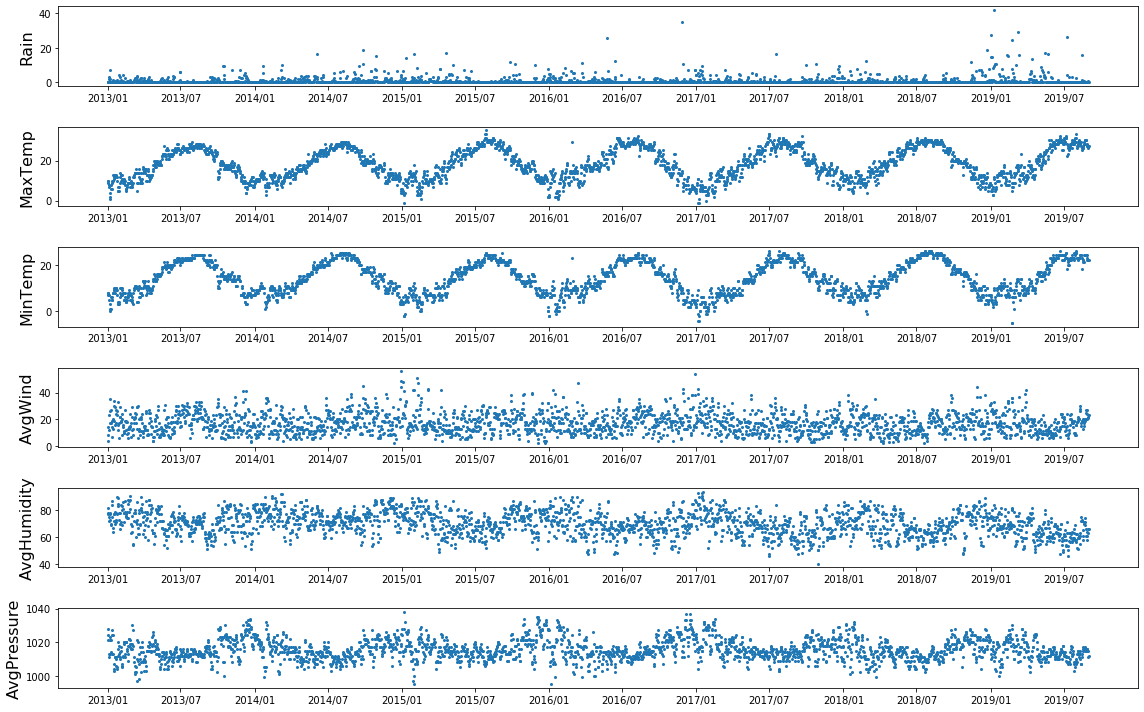

In [6]:
import matplotlib.pyplot as plt

col_vals = ['Rain', 'MaxTemp', 'MinTemp', 'AvgWind', 'AvgHumidity', 'AvgPressure']
col_date = 'DateTime'
nrows = len(col_vals)
width = 16
height = 10

fig, axs = plt.subplots(nrows, 1, figsize=(width, height), facecolor='w')
axs = axs.ravel()
for i, col in enumerate(col_vals):
    axs[i].plot_date(df["2013":].index, df["2013":][col], marker='o', markersize=2, label='Train')
    axs[i].xaxis.set_major_locator(dates.MonthLocator([1,7]))
    axs[i].xaxis.set_major_formatter(dates.DateFormatter('%Y/%m'))
    axs[i].set_ylabel(col, fontsize=16)

plt.tight_layout()
# plt.xticks(rotation=90)
plt.show()

## normalization

In [7]:
#import 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
col_scale = ['Rain', 'MaxTemp', 'MinTemp', 'AvgWind', 'AvgHumidity', 'AvgPressure']
scale=scaler.fit(df.loc[:, col_scale])

transformed = scaler.transform(df.loc[:, col_scale])
# make a trasformed Dataset 
df_transformed = pd.DataFrame(transformed, columns = col_scale)
df_time = pd.DataFrame(df.index)
df_transformed = pd.concat([df_time, df_transformed], axis=1)
df_transformed.head()

,DateTime,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
0,2009-01-01,0.005476,0.200,0.225806,0.148148,0.877193,0.760870
1,2009-01-02,0.106667,0.175,0.193548,0.185185,0.859649,0.630435
2,2009-01-03,0.001905,0.200,0.258065,0.259259,0.947368,0.630435
3,2009-01-04,0.069286,0.200,0.258065,0.129630,0.947368,0.478261
4,2009-01-05,0.102857,0.200,0.258065,0.240741,1.000000,0.500000


## check normalization

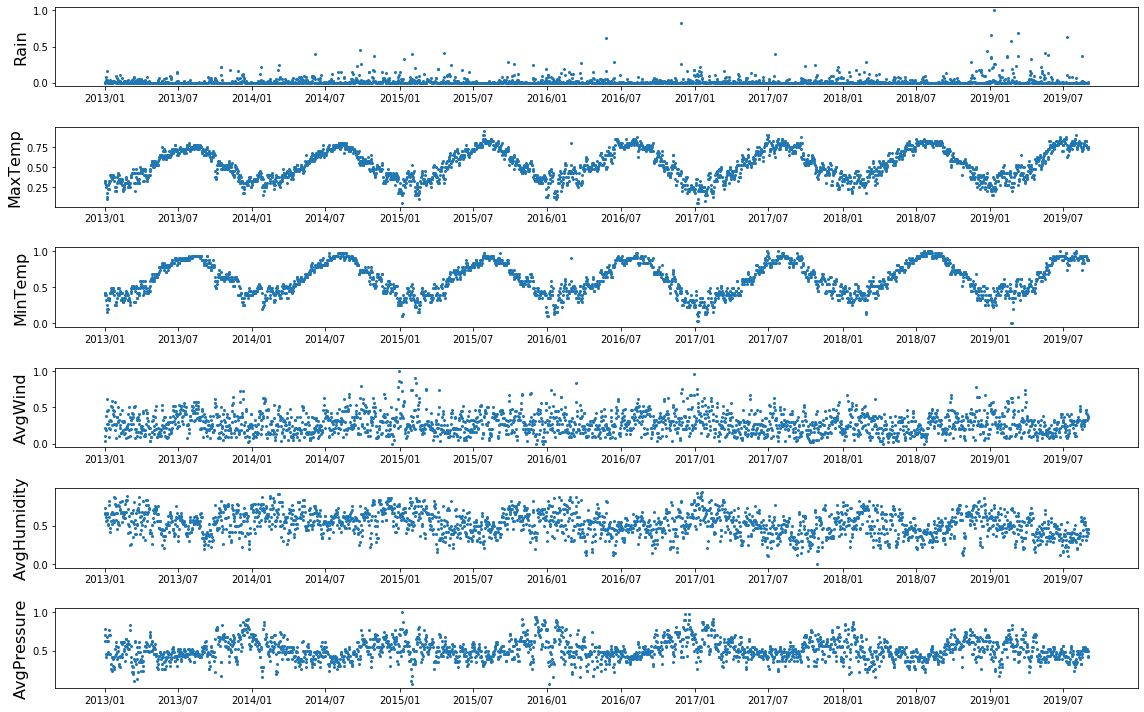

In [8]:
import matplotlib.pyplot as plt
df_transformed= re_organize(df_transformed)
col_vals = ['Rain', 'MaxTemp', 'MinTemp', 'AvgWind', 'AvgHumidity', 'AvgPressure']
col_date = 'DateTime'
nrows = len(col_vals)
width = 16
height = 10

fig, axs = plt.subplots(nrows, 1, figsize=(width, height), facecolor='w')
axs = axs.ravel()
for i, col in enumerate(col_vals):
    axs[i].plot_date(df_transformed["2013":].index, df_transformed["2013":][col], marker='o', markersize=2, label='Train')
    axs[i].xaxis.set_major_locator(dates.MonthLocator([1,7]))
    axs[i].xaxis.set_major_formatter(dates.DateFormatter('%Y/%m'))
    axs[i].set_ylabel(col, fontsize=16)

plt.tight_layout()
# plt.xticks(rotation=90)
plt.show()

In [9]:
lookback = 120
cols_target = ['Rain', 'MaxTemp', 'MinTemp', 'AvgWind', 'AvgHumidity', 'AvgPressure']

df_train_transformed = df_transformed.reset_index(drop=True)
# df_test_transformed = df_test_transformed.reset_index(drop=True)

x = []
t = []
for i in range(1, len(df)-lookback-1):
    x.append(df_train_transformed.loc[i:i+lookback-1,cols_target].values)
    t.append(df_train_transformed.loc[i+lookback,cols_target].values.tolist())
X_train = np.array(x).reshape(-1, lookback, len(cols_target))
y_train = np.array(t)
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)

X_train shape (3774, 120, 6)
y_train shape (3774, 6)


In [10]:
#データの分割
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, test_size=0.1, shuffle=False)

In [11]:
import torch
import torch.nn as nn
from torch.autograd import Variable

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, initial_normal=False):
        super().__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            bidirectional=False).to(device)
        self.fc = nn.Linear(in_features=hidden_size,
                            out_features=num_classes).to(device)
        if initial_normal:
            nn.init.xavier_normal_(self.lstm.weight_ih_l0)
            nn.init.orthogonal_(self.lstm.weight_hh_l0)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)).to(device)
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)).to(device)
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out).to(device)

#         h, _ = self.lstm(x)
#         out = self.fc(h[:, -1])

        return out

In [12]:
class EarlyStopping:
    '''
    早期終了 (early stopping)
    '''
    def __init__(self, patience=0, verbose=0):
        self._step = 0
        self._loss = float('inf')
        self.patience = patience
        self.verbose = verbose

    def __call__(self, loss):
        if self._loss < loss:
            self._step += 1
            if self._step > self.patience:
                if self.verbose:
                    print('early stopping')
                return True
        else:
            self._step = 0
            self._loss = loss

        return False

In [16]:
from sklearn.utils import shuffle
import numpy as np
import torch
import torch.optim as optimizers

np.random.seed(123)
torch.manual_seed(123)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 2000
batch_size = 256
n_batches_train = X_train.shape[0] // batch_size + 1
n_batches_val = X_val.shape[0] // batch_size + 1
learning_rate = 0.01

input_size = 6
hidden_size = 100
num_layers = 1

num_classes = 6

hist = {'loss': [], 'val_loss': []}
es = EarlyStopping(patience=10, verbose=1)

model = LSTM(num_classes, input_size, hidden_size, num_layers).to(device)

criterion = nn.MSELoss()
# mse=nn.L1Loss()
optimizer = optimizers.Adam(model.parameters(),lr=0.001)
# optimizer = optimizers.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optimizer = optim.RMSprop(model.parameters(), lr=0.001)
#                             lr=0.001),
#                             betas=(0.9, 0.999), amsgrad=True)


# criterion = torch.nn.MSELoss()    # mean-squared error for regression
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

In [17]:
preds_0 = 0
t_0 = 0

def train_step(x, t):

    x = torch.Tensor(x).to(device)
    t = torch.Tensor(t).to(device)
    model.train()
    preds = model(x).to(device)
#     print(preds.shape)
    loss = criterion(preds.view(-1),t.view(-1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss, preds

def val_step(x, t):
    x = torch.Tensor(x).to(device)
    t = torch.Tensor(t).to(device)
    model.eval()
    preds = model(x)
    loss = criterion(preds, t)

    return loss, preds

## train the LSTM

In [18]:
# Train the model
for epoch in range(num_epochs):
    train_loss = 0.
    val_loss = 0.
    x_, y_ = shuffle(X_train, y_train)

    for batch in range(n_batches_train):
        start = batch * batch_size
        end = start + batch_size
#         print(start, end)
        loss, _ = train_step(x_[start:end], y_[start:end])
        train_loss += loss.item()

    for batch in range(n_batches_val):
        start = batch * batch_size
        end = start + batch_size
        loss, _ = val_step(X_val[start:end], y_val[start:end])
        val_loss += loss.item()

    train_loss /= n_batches_train
    val_loss /= n_batches_val

    hist['loss'].append(train_loss)
    hist['val_loss'].append(val_loss)

    print('epoch: {}, loss: {:.3}, val_loss: {:.3f}'.format(
        epoch+1,
        train_loss,
        val_loss
    ))

    if es(val_loss):
        break

epoch: 1, loss: 0.136, val_loss: 0.027
epoch: 2, loss: 0.0293, val_loss: 0.028
epoch: 3, loss: 0.0222, val_loss: 0.020
epoch: 4, loss: 0.0169, val_loss: 0.012
epoch: 5, loss: 0.0131, val_loss: 0.013
epoch: 6, loss: 0.0121, val_loss: 0.011
epoch: 7, loss: 0.012, val_loss: 0.011
epoch: 8, loss: 0.0118, val_loss: 0.011
epoch: 9, loss: 0.0115, val_loss: 0.011
epoch: 10, loss: 0.0114, val_loss: 0.011
epoch: 11, loss: 0.0113, val_loss: 0.011
epoch: 12, loss: 0.0113, val_loss: 0.011
epoch: 13, loss: 0.0112, val_loss: 0.010
epoch: 14, loss: 0.011, val_loss: 0.010
epoch: 15, loss: 0.011, val_loss: 0.010
epoch: 16, loss: 0.0109, val_loss: 0.010
epoch: 17, loss: 0.0107, val_loss: 0.010
epoch: 18, loss: 0.0106, val_loss: 0.010
epoch: 19, loss: 0.0105, val_loss: 0.010
epoch: 20, loss: 0.0103, val_loss: 0.010
epoch: 21, loss: 0.0101, val_loss: 0.010
epoch: 22, loss: 0.01, val_loss: 0.010
epoch: 23, loss: 0.00975, val_loss: 0.010
epoch: 24, loss: 0.00963, val_loss: 0.009
epoch: 25, loss: 0.0095, val_

## predict rainfall, temp,wind,humidity and pressure

In [20]:
model.eval()
x_ = torch.Tensor(X_val).to(device)
preds_val = model(x_).data.cpu().numpy()
preds_val.shape

(378, 6)

In [21]:
df_preds_val = pd.DataFrame(preds_val,columns=['Rain', 'MaxTemp', 'MinTemp', 'AvgWind', 'AvgHumidity', 'AvgPressure'])
df_val = pd.DataFrame(y_val, columns=['Rain', 'MaxTemp', 'MinTemp', 'AvgWind', 'AvgHumidity', 'AvgPressure'])

In [22]:
df_preds_val

,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
0,0.009644,0.793582,0.946540,0.389953,0.376668,0.434908
1,0.016962,0.765300,0.923570,0.383860,0.446331,0.416813
2,0.011086,0.759938,0.913260,0.307014,0.447368,0.433379
3,0.009070,0.766752,0.921851,0.364915,0.437820,0.441091
4,0.013245,0.788179,0.941361,0.406406,0.395059,0.413716
...,...,...,...,...,...,...
373,0.009284,0.778193,0.930237,0.394737,0.425532,0.472105
374,0.010366,0.767730,0.918110,0.394463,0.404227,0.473942
375,0.013130,0.749635,0.899683,0.362282,0.436148,0.459859
376,0.007982,0.740376,0.885750,0.317324,0.432600,0.482589


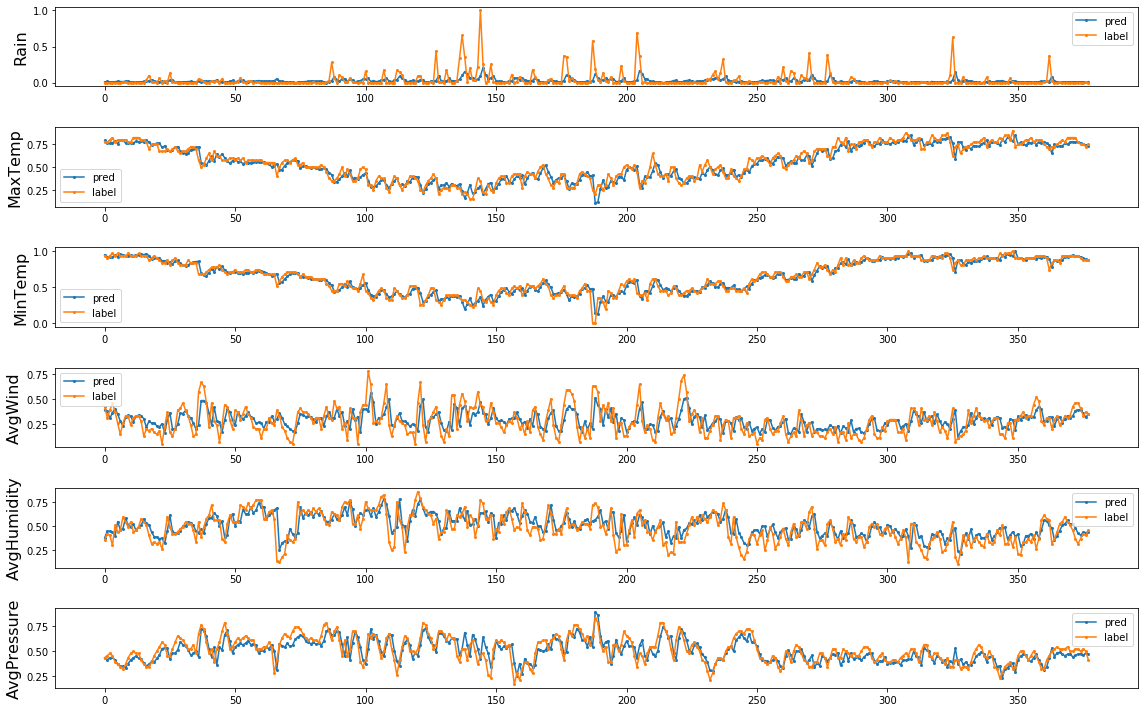

In [23]:
import matplotlib.pyplot as plt

col_vals = ['Rain', 'MaxTemp', 'MinTemp', 'AvgWind', 'AvgHumidity', 'AvgPressure']
nrows = len(col_vals)
width = 16
height = 10

fig, axs = plt.subplots(nrows, 1, figsize=(width, height), facecolor='w')
axs = axs.ravel()
for i, col in enumerate(col_vals):
    axs[i].plot(df_preds_val.index, df_preds_val[col], marker='o', markersize=2, label='pred')
    axs[i].plot(df_val.index, df_val[col], marker='o', markersize=2, label='label')
    axs[i].set_ylabel(col, fontsize=16)
    axs[i].legend()

plt.tight_layout()
plt.show()

## check laerning progress

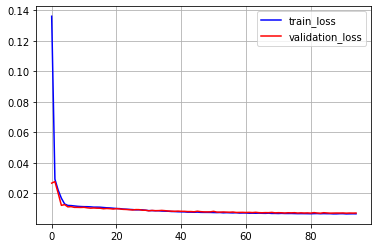

In [153]:
plt.plot(range(len(hist["loss"])),hist["loss"],
         color='blue', linestyle='-', label='train_loss')
plt.plot(range(len(hist["val_loss"])), hist["val_loss"],
         color='r', linestyle='-', label='validation_loss')

plt.legend()
plt.grid()